https://www-eng.lbl.gov/~shuman/NEXT/CURRENT_DESIGN/TP/MATERIALS/IPC-2221A(L).pdf

In [2]:
from localcode2 import *
fig_counter=1

In [6]:

fig_counter =  One_figure_with_captions(fig_counter,
                                        img1="clearance1.png", 
                                        caption1="IPC-2221A, Table 6-1 Electrical Conductor Spacing", 
                                        first_part_path="./03_figures/", 
                                        width=18)
    

In [15]:
from handcalcs import render 

In [19]:
%%render

Vmax = 600
rate = 0.005 # mm/V B2
functional_creapage = Vmax * rate # mm

<IPython.core.display.Latex object>

https://u.dianyuan.com/bbs/u/58/1923421193536807.pdf

In [ ]:
IEC 60664-1 © CEI:2007

https://u.dianyuan.com/bbs/u/71/15141227974190.pdf

page 12

IPC-9592

UL 840


https://u.dianyuan.com/bbs/u/35/1131369881.pdf


page 21

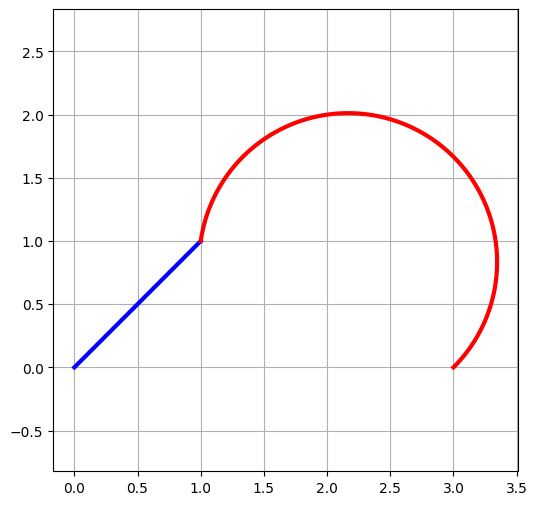

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Function to draw a line
# ---------------------------
def draw_line(p1, p2, width=1, raw=False, color='blue'):
    """
    Draw a line from p1 to p2.
    p1, p2: tuples (x, y)
    width: line width
    raw: if True, just plot points instead of plt.plot
    """
    x = [p1[0], p2[0]]
    y = [p1[1], p2[1]]
    if raw:
        plt.scatter(x, y, s=width*10, color=color)
    else:
        plt.plot(x, y, linewidth=width, color=color)

# ---------------------------
# Function to draw an arc passing 3 points
# ---------------------------
def draw_arc(p1, p2, p3, width=1, raw=False, color='red', n_points=100):
    """
    Draw arc passing through points p1, p2, p3
    """
    # Solve circle from 3 points
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    
    temp = x2**2 + y2**2
    bc = (x1**2 + y1**2 - temp) / 2.0
    cd = (temp - x3**2 - y3**2) / 2.0
    det = (x1 - x2)*(y2 - y3) - (x2 - x3)*(y1 - y2)
    if abs(det) < 1e-10:
        raise ValueError("Points are collinear")
    
    # Center of circle
    cx = (bc*(y2 - y3) - cd*(y1 - y2)) / det
    cy = ((x1 - x2)*cd - (x2 - x3)*bc) / det
    
    r = np.sqrt((cx - x1)**2 + (cy - y1)**2)
    
    # Compute angles
    angles = np.arctan2([y1 - cy, y2 - cy, y3 - cy], [x1 - cx, x2 - cx, x3 - cx])
    # Sort angles to go through p1->p2->p3
    angles = np.unwrap(angles)
    theta = np.linspace(angles[0], angles[2], n_points)
    
    x_arc = cx + r * np.cos(theta)
    y_arc = cy + r * np.sin(theta)
    
    if raw:
        plt.scatter(x_arc, y_arc, s=width*5, color=color)
    else:
        plt.plot(x_arc, y_arc, linewidth=width, color=color)



def arc90_third_point(p1, p2, angle_deg):
    """
    Given two endpoints of a 90° arc, return the third point (the 'corner' point of the right-angle arc)
    according to a chosen sweep angle.
    
    p1, p2: tuples (x, y)
    angle_deg: +90 => counter-clockwise, -90 => clockwise
    """
    x1, y1 = p1
    x2, y2 = p2
    
    # Midpoint of segment
    mx, my = (x1 + x2)/2, (y1 + y2)/2
    
    # Vector from p1 to p2
    dx, dy = x2 - x1, y2 - y1
    
    # Distance between endpoints
    d = np.hypot(dx, dy)
    
    # Distance from midpoint to third point
    h = d / 2
    
    # Perpendicular vector (normalized)
    perp_dx, perp_dy = -dy/d, dx/d
    
    # Choose third point based on angle sign
    if angle_deg > 0:
        c = (mx + perp_dx*h, my + perp_dy*h)
    else:
        c = (mx - perp_dx*h, my - perp_dy*h)
    
    return np.array(c)





def rotate_point(point, angle_deg):
    """
    Rotate a 2D point by angle_deg degrees counter-clockwise.
    point: np.array([x, y])
    """
    theta = np.deg2rad(angle_deg)
    rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta),  np.cos(theta)]])
    return rot_matrix @ point

    
# ---------------------------
# Example usage
# ---------------------------
plt.figure(figsize=(6,6))
draw_line((0,0), (1,1), width=3)
draw_arc((1,1), (2,2), (3,0), width=3)
plt.axis('equal')
plt.grid(True)
plt.show()


In [33]:
from copy import copy 

[ 0 10] [-11.   1.] [-7.36396103  7.77817459]
[-11.   1.] [ -2. -10.] [-8.77817459 -6.36396103]
[ -2. -10.] [ 9. -1.] [ 5.36396103 -7.77817459]
[ 9. -1.] [2.38868024e-15 1.00000000e+01] [6.77817459 6.36396103]
[ 0. 11.] [-12.   1.] [-8.07106781  8.48528137]
[-12.   1.] [ -2. -11.] [-9.48528137 -7.07106781]
[ -2. -11.] [10. -1.] [ 6.07106781 -8.48528137]
[10. -1.] [3.11604639e-15 1.10000000e+01] [7.48528137 7.07106781]
[ 0. 12.] [-13.   1.] [-8.77817459  9.19238816]
[-13.   1.] [ -2. -12.] [-10.19238816  -7.77817459]
[ -2. -12.] [11. -1.] [ 6.77817459 -9.19238816]
[11. -1.] [3.17727873e-15 1.20000000e+01] [8.19238816 7.77817459]
[ 0. 13.] [-14.   1.] [-9.48528137  9.89949494]
[-14.   1.] [ -2. -13.] [-10.89949494  -8.48528137]
[ -2. -13.] [12. -1.] [ 7.48528137 -9.89949494]
[12. -1.] [3.23851107e-15 1.30000000e+01] [8.89949494 8.48528137]
[ 0. 14.] [-15.   1.] [-10.19238816  10.60660172]
[-15.   1.] [ -2. -14.] [-11.60660172  -9.19238816]
[ -2. -14.] [13. -1.] [  8.19238816 -10.60660172

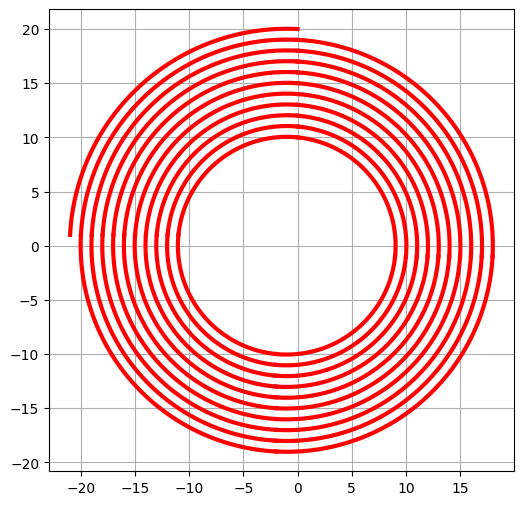

In [60]:
R1= 10
R2 = 20
pas = 1
r=R1
npas = 4

p1 = np.array([0,R1])
p2= rotate_point(p1, 360/npas)


plt.figure(figsize=(6,6))
#draw_line((0,0), (1,1), width=3)

i = 0 
while (r <=R2):
    if i%npas ==0:
        p1 = np.array([0,r])
    else: 

        p1 = copy(p2)
    p2 = rotate_point(np.array([p1[0]+pas,p1[1]+pas]), 360/npas)
    pm= arc_third_point(p1, p2,90)
    print(p1,p2,pm)
        
    r=r+pas/4
    i=i+1

    draw_arc(p1, pm, p2, width=3)
plt.axis('equal')
plt.grid(True)
plt.show()


    
    

In [56]:
p1

array([ 0., 20.])

In [44]:
import numpy as np

def arc_third_point(p1, p2, angle_deg):
    """
    Given two endpoints of an arc (p1, p2) and a sweep angle in degrees,
    return the third point located at that angle from the chord.
    
    Positive angle = counter-clockwise arc
    Negative angle = clockwise arc
    """
    x1, y1 = p1
    x2, y2 = p2
    
    # Chord vector
    dx, dy = x2 - x1, y2 - y1
    d = np.hypot(dx, dy)  # chord length
    
    # Half chord vector
    mx, my = (x1 + x2)/2, (y1 + y2)/2
    
    # Convert angle to radians
    theta = np.deg2rad(angle_deg)
    
    # Distance from midpoint to arc center
    # Using circle geometry: R = d / (2 * sin(theta/2))
    R = d / (2 * np.sin(abs(theta)/2))
    
    # Distance from midpoint to center along perpendicular
    h = np.sqrt(R**2 - (d/2)**2)
    
    # Perpendicular vector normalized
    perp_dx, perp_dy = -dy/d, dx/d
    
    # Choose direction based on sign of theta
    if angle_deg > 0:
        cx = mx + perp_dx * h
        cy = my + perp_dy * h
    else:
        cx = mx - perp_dx * h
        cy = my - perp_dy * h
    
    # Now compute the third point on the arc, halfway in angle from p1
    # Start angle from center to p1
    a1 = np.arctan2(y1 - cy, x1 - cx)
    a_mid = a1 + np.deg2rad(angle_deg)/2
    
    # Third point
    px = cx + R * np.cos(a_mid)
    py = cy + R * np.sin(a_mid)
    
    return np.array([px, py])

# ---------------------------
# Example usage
# ---------------------------
p1 = np.array([0, 0])
p2 = np.array([40, 0])

print(arc_third_point(p1, p2, 90))    # Quarter circle CCW
print(arc_third_point(p1, p2, -90))   # Quarter circle CW
print(arc_third_point(p1, p2, 45))    # Small arc CCW
print(arc_third_point(p1, p2, -45))   # Small arc CW


[20.         -8.28427125]
[20.          8.28427125]
[20.         -3.97824735]
[20.          3.97824735]


In [38]:
rotate_point([0,10], 360/npas)

array([-1.000000e+01,  6.123234e-16])

In [29]:
arc90_third_point(p1, p2)

array([0., 0.])

In [42]:
arc90_third_point(p1, p2,-45/2)
array([-20.,  20.])
arc90_third_point(p1, p2,-45)
array([-20.,  20.])

array([-20.,  20.])

In [43]:
arc90_third_point(p1, p2,-45)

array([-20.,  20.])